In [72]:
%matplotlib inline
%cd /home/wallar/projects/nyc-taxi-analysis/

/home/wallar/projects/nyc-taxi-analysis


In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
from sklearn.neighbors import BallTree

In [142]:
data_fname = "/home/wallar/fast_data/nyc_taxi_data.csv.gz"
df_options = {"nrows": 3000000,
              "parse_dates": ["pickup_datetime", "dropoff_datetime"],
              "infer_datetime_format": True,
              "skip_blank_lines": True}
data = pd.read_csv(data_fname, **df_options)
data.dropna(inplace=True)
stations = pd.read_csv("data/stations.csv")
n_stations = stations.shape[0]
rad_sts = np.radians(stations.as_matrix(["lng", "lat"]))
stations_kd = BallTree(rad_sts, metric="haversine")

In [143]:
picks = np.radians(data.as_matrix(["pickup_longitude", "pickup_latitude"]))
drops = np.radians(data.as_matrix(["dropoff_longitude", "dropoff_latitude"]))
p_inds = stations_kd.query(picks)
d_inds = stations_kd.query(drops)

In [150]:
freqs = np.zeros((n_stations, n_stations), dtype=list)
for i in tqdm.tqdm_notebook(range(p_inds[0].shape[0])):
    t = data.pickup_datetime.iloc[i]
    p_ind = p_inds[1][i][0]
    d_ind = d_inds[1][i][0]
    if freqs[p_ind][d_ind] == 0:
        freqs[p_ind][d_ind] = list()
    freqs[p_ind][d_ind].append(t)

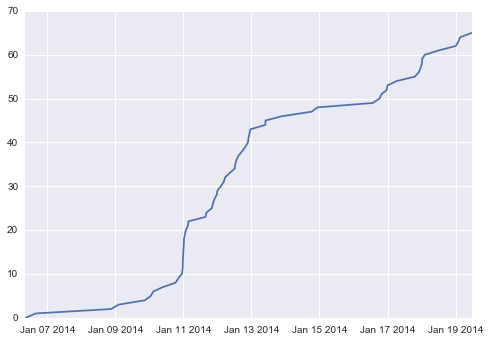

In [151]:
maxp = 0
maxd = 0
maxv = 0
"""
for i in xrange(n_stations):
    for j in xrange(n_stations):
        if freqs[i][j] != 0:
            v = len(freqs[i][j])
            if v > maxv:
                maxv = v
                maxp = i
                maxd = j
"""
f = np.sort(freqs[140][190])
plt.plot(f, range(len(f)))